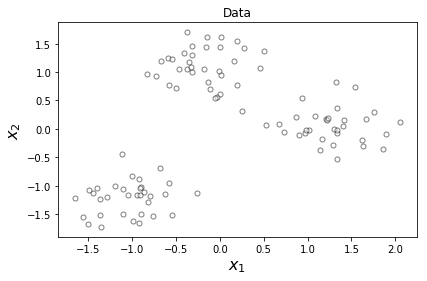

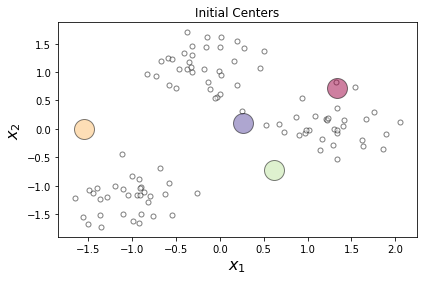

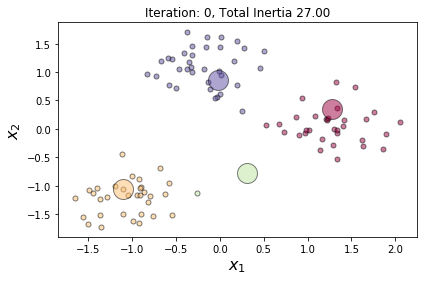

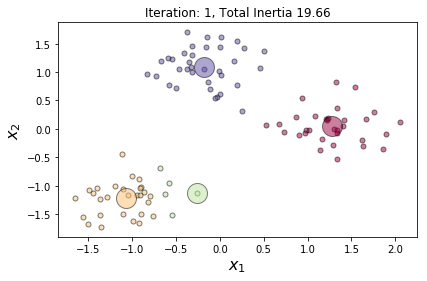

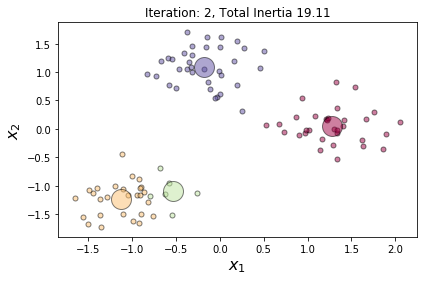

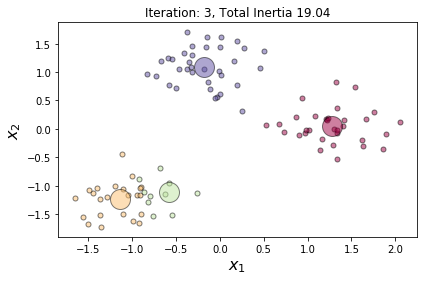

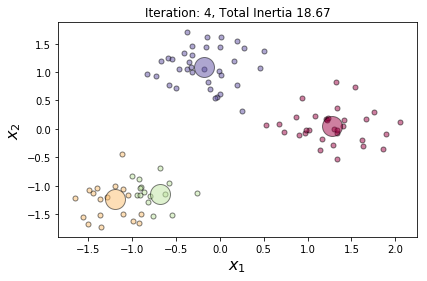

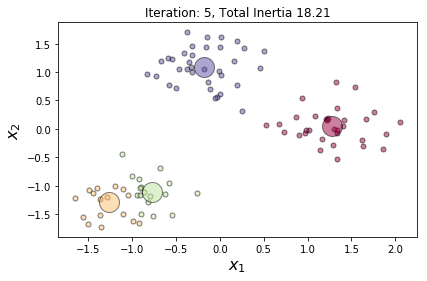

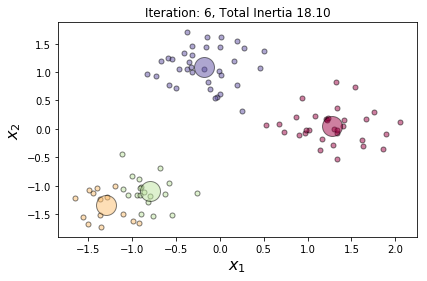

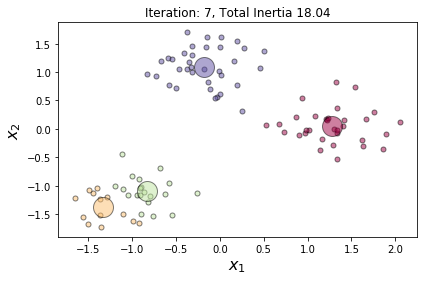

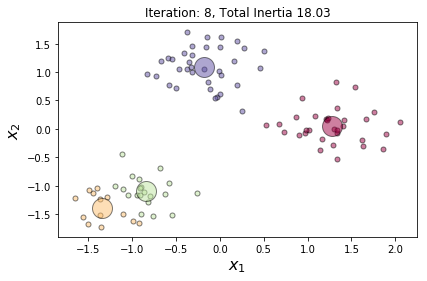

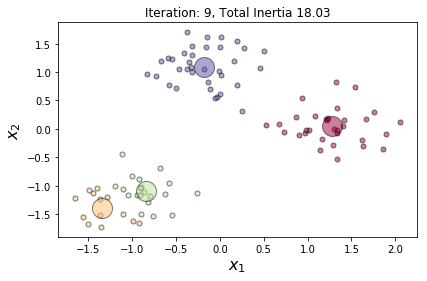

In [91]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

import time
import sys
#plt.ion()
import pdb
n_clusters=3
n_labels=3
%matplotlib inline 
std=2

# Black removed and is used for noise instead.
def plot_clusters(labels, clusters, X,i, inertia,init=False):
  
  h = plt.figure()
#   plt.clf()
  unique_labels = set(labels)
  colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


  #print('colors:',colors)
  for k, col in zip(unique_labels, colors):
    #print('k:',k,'col:',col)
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
   
    
    if clusters is None:
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(1,1,1,1),
             markeredgecolor='k', markersize=5, alpha=0.5)
    else:
        if init:
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(1,1,1,1),
         markeredgecolor='k', markersize=5, alpha=0.5)
        else:
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=5, alpha=0.5)
  if clusters is not None:
      colors2 = plt.cm.Spectral(np.linspace(0, 1, len(clusters)))
      for k, col in zip(np.arange(len(clusters)), colors2):
            plt.plot(clusters[k,0],clusters[k,1],'o',markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=20,alpha=0.5)
  plt.xlabel('$x_1$',size=16) 
  plt.ylabel('$x_2$',size=16)
  if init:
      plt.title('Initial Centers')  
      h.tight_layout()
      h.savefig('kmeans_init.pdf')
  elif clusters is None:
      plt.title('Data')
      h.tight_layout()
      h.savefig('kmeans_data.pdf')
  else:
      plt.title('Iteration: %d, Total Inertia %.2f'%(i,inertia))  
      h.tight_layout()
      h.savefig('kmeans_'+str(i)+'.pdf')
##############################################################################
# Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1],[-1,1]]

X, labels_true = make_blobs(n_samples=100, centers=n_clusters, cluster_std=std, random_state=42)
X = StandardScaler().fit_transform(X)


plot_clusters(labels_true,None,X,0,np.inf,init=False)

##############################################################################
# Compute KMeans
# good initialization
# np.random.seed(10)
# centers = np.random.randn(n_clusters, 2)
#bad initial start
# centers = np.array([(-1,-1.5),(-.75,-1),(1,1)])
# not enough clusters
# n_labels=2
# np.random.seed(10)
# centers = np.random.randn(n_labels, 2)
# too many clusters
n_labels=4
np.random.seed(10)
centers = np.random.randn(n_labels, 2)
#initial model
plot_clusters(labels_true,centers,X,0,np.inf,init=True)

old_inertia = np.inf
for i in range(100):
  km = KMeans(n_clusters=n_labels, n_init=1,init=centers,max_iter=1,random_state=0).fit(X)
  labels = km.labels_
  centers = km.cluster_centers_
  inertia = km.inertia_
  plot_clusters(labels, centers, X,i, inertia)
  if(abs(old_inertia - inertia)/inertia < 1e-6):
    break
  else:
    old_inertia = inertia
    
plt.show()

In [ ]:
# generate example data

import numpy as np
from sklearn.datasets.samples_generator import make_blobs
n_clusters = 3

X, labels = make_blobs(n_samples=100, centers=n_clusters, cluster_std=std,random_state=0)

for i in range(100):
    m = KMeans(n_clusters=n_clusters, n_init=1,init='random',max_iter=1).fit(X)